In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import glob

import datetime as dt

import gsw as sw
from mpl_toolkits.basemap import Basemap, cm, interp

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})



/Users/archie/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

In [3]:
# import KE index data

kei = pd.read_csv('../data/length_delh_posi_RG_KEI_lines.asc', sep = '   ')


/Users/archie/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [4]:
kei = kei.dropna(axis=1, how='all')
# kei.loc[(kei['Decimal Yr']>2010.999) & (kei['Decimal Yr']<2012.999)]

# find the day number for the cruises and get the position of the KE for each one

In [5]:
# mean KE location for cruises
startday = [121./365, 183./366, 244./365]
endday = [151./365, 213./366, 273./365]
year = [2011., 2012., 2011.]

decstart = np.add(year,startday)
decend = np.add(year, endday)

print decstart, decend

[ 2011.33150685  2012.5         2011.66849315] [ 2011.41369863  2012.58196721  2011.74794521]


In [6]:
# for may data

may_ke = kei[(kei['Decimal Yr']>decstart[0]) & (kei['Decimal Yr']<decend[0])]
print may_ke.mean(), may_ke.std()

Decimal Yr       2011.37125
Length           1873.80725
 Strength          45.12100
 Position          35.07275
Unnamed: 5          0.89225
Unnamed: 6              NaN
KEI                 0.15950
Unnamed: 8              NaN
KEI(smoothed)       0.80600
dtype: float64 Decimal Yr        0.024918
Length           79.981791
 Strength         2.194839
 Position         0.097527
Unnamed: 5        0.030037
Unnamed: 6             NaN
KEI               0.053075
Unnamed: 8             NaN
KEI(smoothed)     0.003916
dtype: float64


In [7]:
# for july data

july_ke = kei[(kei['Decimal Yr']>decstart[1]) & (kei['Decimal Yr']<decend[1])]
print july_ke.mean(), july_ke.std()

Decimal Yr       2012.53950
Length           1307.23925
 Strength          57.52675
 Position          35.69925
Unnamed: 5          1.04175
Unnamed: 6              NaN
KEI                 1.39075
Unnamed: 8              NaN
KEI(smoothed)       0.71325
dtype: float64 Decimal Yr        0.024529
Length           40.358568
 Strength         3.280559
 Position         0.047479
Unnamed: 5        0.012606
Unnamed: 6             NaN
KEI               0.067535
Unnamed: 8             NaN
KEI(smoothed)     0.000957
dtype: float64


In [8]:
# for september data

sep_ke = kei[(kei['Decimal Yr']>decstart[2]) & (kei['Decimal Yr']<decend[2])]
print sep_ke.mean(), sep_ke.std()

Decimal Yr       2011.71650
Length           1326.02775
 Strength          68.60725
 Position          35.79950
Unnamed: 5          1.40050
Unnamed: 6              NaN
KEI                 2.23700
Unnamed: 8              NaN
KEI(smoothed)       0.92100
dtype: float64 Decimal Yr        0.024529
Length           55.574902
 Strength         1.705818
 Position         0.050468
Unnamed: 5        0.061906
Unnamed: 6             NaN
KEI               0.188727
Unnamed: 8             NaN
KEI(smoothed)     0.003162
dtype: float64


366


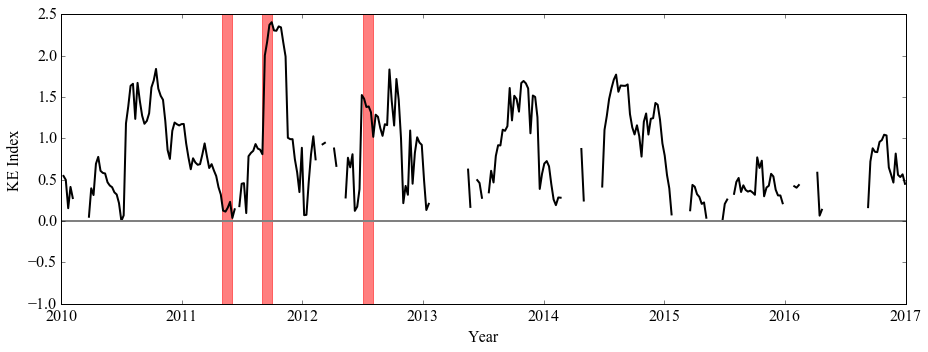

In [49]:
kk = kei[(kei['Decimal Yr']>=2010) & (kei['Decimal Yr']<2017)]

print len(kk)
fig0 = plt.figure(figsize=(13, 5))
plt.plot(kk['Decimal Yr'], kk['KEI'], lw = 2, color='k')
plt.axhline(0, c ='grey', lw=2)
plt.axis([2010.0, 2016.9, -1, 2.5])
plt.tick_params(labelsize = 16)
plt.xticks(np.arange(2010, 2018, 1), np.arange(2010, 2018, 1))
plt.xlabel('Year', fontsize = 16)
plt.ylabel('KE Index', fontsize = 16)
plt.axvspan(decstart[2], decend[2],color='red', alpha = 0.5)
plt.axvspan(decstart[0], decend[0],color='red', alpha = 0.5)
plt.axvspan(decstart[1], decend[1],color='red', alpha = 0.5)

plt.show()